# Some cars production-sales info

In [1]:
import pandas as pd
from datetime import datetime, date, timedelta
import re
import numpy as np
import time
import sqlalchemy as sa

import plotly.plotly as py
import plotly.offline as offline
from plotly.tools import FigureFactory as FF
import plotly.graph_objs as go
from plotly import tools

%run '../serv_energy.py'

offline.init_notebook_mode(connected=True)
eng_co=sa.create_engine('sqlite+pysqlite:///cars.sqlite3') #, echo=True)

In [2]:
pdfCarsSales=FuelsDataFrame(pd.read_sql('sales_germany', con=eng_co))
pdfCarsProd=FuelsDataFrame(pd.read_sql('production_germany', con=eng_co))

lst_sl=set(pdfCarsSales['Model'].unique().tolist())
lst_pr=set(pdfCarsProd['Model'].unique().tolist())

print(pdfCarsSales['Model'].unique().tolist())
print(pdfCarsProd['Model'].unique().tolist())
print()
print(lst_pr-lst_sl)

['AlfaRomeo', 'MAN', 'Mazda', 'Mercedes-Benz', 'Minerva', 'Mitsubishi', 'Multicar', 'Nissan', 'Opel', 'Peugeot', 'Piaggio', 'Porsche', 'Subaru', 'SsangYong', 'Smart', 'LandRover', 'Skoda', 'Santana', 'Saab', 'Renault', 'Seat', 'Lancia', 'Lada', 'Dodge', 'Daimler', 'Daihatsu', 'Dacia', 'BMW', 'DAF', 'Chrysler', 'Chevrolet', 'Cadillac', 'Citroen', 'Suzuki', 'Ford', 'Kia', 'Jeep', 'Jaguar', 'Audi', 'Fiat', 'Iveco', 'Hyundai', 'Honda', 'GeneralMotors', 'Isuzu', 'Volkswagen', 'Volvo', 'Toyota', 'Rover', 'Temsa', 'LADOG', 'Lexus', 'Infiniti', 'Neoplan', 'VDL', 'Solaris', 'Evobus', 'Samsung', 'VanHool', 'Tata', 'Hako', 'KAMAG', 'Caterpillar', 'Terberg', 'Ferrari', 'AstonMartin', 'Rolls-Royce', 'Tesla', 'Wiesmann', 'Bentley', 'Maserati', 'Morgan', 'Lamborghini', 'Lotus', 'Maybach', 'GoppelBus', 'DS', 'Bergmann', 'StreetScooter', 'BucherSchorling', 'WackerNeuson', 'Alpine']
['Audi', 'BMW', 'Ford', 'Maybach', 'Mercedes-Benz', 'Opel', 'Porsche', 'Seat', 'Volkswagen']

set()


In [3]:
dctWhose={'Acura':'jp', 'AlfaRomeo':'ita', 'Audi':'ger', 'BAW':'ch', 'BMW':'ger', 'BYD':'ch', 
          'Brilliance':'ch', 'Cadillac':'usa', 'ChangAn':'ch', 'Chery':'ch', 
          'Chevrolet':'usa', 'Chrysler':'usa', 'Citroen':'fra', 'Dacia':'ro', 'Daewoo':'kor', 'Datsun':'kor', 
          'Dodge':'usa', 'DongFeng':'ch', 'Emgrand':'ch', 
          'FAW':'ch', 'Fiat':'ita', 'Ford':'usa', 'Foton':'ch', 'Geely':'ch', 'Genesis':'kor', 'GreatWall':'ch', 
          'Haima':'ch', 'Haval':'ch', 'Hawtai':'ch', 'Honda':'jp', 
          'Hummer':'usa', 'Hyundai':'kor', 'Infiniti':'jp', 'Isuzu':'jp', 'Iveco':'ita', 'JAC':'ch', 'Jaguar':'gb', 
          'Jeep':'usa', 'Kia':'kor', 'Lada':'ru', 'LandRover':'gb', 
          'Lexus':'jp', 'Lifan':'ch', 'Luxgen':'ch', 'Mazda':'jp', 'Mercedes-Benz':'ger', 'Minerva':'bel', 
          'Mitsubishi':'jp', 'Nissan':'jp', 'Opel':'ger', 'Peugeot':'fra', 
          'Porsche':'ger', 'Ravon':'uzb', 'Renault':'fra', 'Saab':'swe', 'Seat':'spa', 'Skoda':'che', 'Smart':'ger', 
          'SsangYong':'kor', 'Subaru':'jp', 'Suzuki':'jp', 'Toyota':'jp', 
          'Volkswagen':'ger', 'Volvo':'swe', 'Vortex':'ch', 'Zotye':'ch', 'Богдан':'ukr', 'ГАЗ':'ru', 
          'ЗАЗ':'ukr', 'Иж':'ru', 'ТагАЗ':'ru', 'УАЗ':'ru', 
          'Komatsu':'jp', 'Бронто':'ru', 'ГолАЗ':'ru', 'ЗИЛ':'ru', 'ВИС':'ru', 'Тролза':'ru', 
          'Тонар':'ru', 'Урал':'ru', 'БЗКТ':'ru', 'MAN':'ger', 'Scania':'swe', 'Волжанин':'ru', 
          'MG':'ch', 'КаВЗ':'ru', 'КамАЗ':'ru', 'НефАЗ':'ru', 'ПАЗ':'ru', 'Caterpillar':'usa', 'ЛиАЗ':'ru'}

setEuroHigh={'AlfaRomeo', 'Audi', 'BMW', 'Jaguar', 'Mercedes-Benz', 'Minerva', 'Porsche', 'Saab', 'Smart', 
             'Volvo', 'LandRover'}
setTruck={'MAN', 'Iveco', 'Isuzu', 'Komatsu', 'Caterpillar', 'Scania', 'ГолАЗ', 'ЗИЛ', 'Тролза', 'Тонар', 'Урал', 
         'БЗКТ', 'Волжанин', 'КаВЗ', 'КамАЗ', 'НефАЗ', 'ПАЗ', 'Caterpillar', 'ЛиАЗ', 'ГАЗ'}
setEuroMiddle={'Chevrolet', 'Citroen', 'Dacia', 'Fiat', 'Ford', 'Renault', 'Seat', 'Skoda', 
               'Volkswagen', 'Opel', 'Peugeot'}
setJapanHigh={'Acura', 'Honda', 'Infiniti', 'Lexus', 'Toyota', 'Genesis'}
setJapanMiddle={'Mazda', 'Nissan', 'Subaru', 'Suzuki', 'Mitsubishi'}
setKorea={k for (k, v) in dctWhose.items() if v == 'kor' if k not in setJapanHigh}
setChina ={k for (k, v) in dctWhose.items() if v == 'ch'}
setUSA={'Hummer', 'Chrysler', 'Cadillac', 'Dodge', 'Jeep'}
setOther ={k for (k, v) in dctWhose.items() if k not in setEuroHigh | setTruck | setEuroMiddle | setJapanHigh | setJapanMiddle | setKorea | setChina | setUSA}

#print(setKorea)
#print(setChina)
#print(setOther)

In [4]:
def grouping1(x):
    if x in setEuroHigh | setJapanHigh | setUSA:
        return 'rich'
    if x in setTruck:
        return 'truck'
    if x in setEuroMiddle | setJapanMiddle | setKorea:
        return 'middle'
    if x in setChina:
        return 'china'
    return 'rus-ukr-uz'

#pdfCarsSales['country']=pdfCarsSales['Model'].apply(lambda x: dctWhose[x])
#grpS=pdfCarsSales.groupby(['country', 'date'])
#pdfCntr=grpS['Count'].sum().reset_index()

pdfCarsSales['type']=pdfCarsSales['Model'].apply(grouping1)
grpS1=pdfCarsSales.groupby(['type', 'date'])
pdfType=FuelsDataFrame(grpS1['Count'].sum().reset_index().rename(columns={'date':'Date'})).set_index('Date')
pdfType.index_to_datetime().sort_index(inplace=True)

print(pdfType.head(10))
#print(pdfCarsSales)
#print(pdfTypes)

                  type     Count
Date                            
2010-01-01       truck    1174.0
2010-01-01      middle  136721.0
2010-01-01  rus-ukr-uz    4201.0
2010-01-01        rich   52275.0
2010-02-01        rich   59286.0
2010-02-01  rus-ukr-uz    4297.0
2010-02-01       truck    1271.0
2010-02-01      middle  143418.0
2010-03-01      middle  209091.0
2010-03-01        rich   96810.0


In [5]:
draw_lines=pdfType['type'].unique().tolist()
pdfDraw=[pdfType[pdfType['type']== tp] for tp in draw_lines]

offline.iplot([{'x':pdf.index, 'y':pdf['Count'], 'name':pdf['type'][0]} for pdf in pdfDraw])

In [6]:
def get_line(pdfScr, str_filter='', title='', color='', mltp=1e3, yaxis=1):
    pdf=pdfScr[pdfScr['type']==str_filter]

    if yaxis==2:
        return go.Scatter(x=pdf.index, y=pdf['Count']/mltp, 
              name=title, line=dict(color=(color)), yaxis='y2')
    return go.Scatter(x=pdf.index, y=pdf['Count']/mltp, 
              name=title, line=dict(color=(color)))

trace1=get_line(pdfType, str_filter='truck', title='Грузовые, автобусы, коммерческие', color='navy', mltp=1e2)
trace2=get_line(pdfType, str_filter='middle', title='Иномарки среднего класса', color='maroon')
trace3=get_line(pdfType, str_filter='rich', title='Иномарки класса выше среднего', color='teal')
trace4=get_line(pdfType, str_filter='china', title='Китайские', color='orange')
trace5=get_line(pdfType, str_filter='rus-ukr-uz', title='Россия-Украина-Узбекистан', color='darkgrey')

fig_sp=tools.make_subplots(rows=3, cols=1, shared_xaxes=True)
fig_sp.append_trace(trace1, 1, 1)
fig_sp.append_trace(trace2, 2, 1)
fig_sp.append_trace(trace3, 3, 1)

fig_sp['layout'].update(height=600, width=900, title='Продажи автомобилей в РФ')
#layout=dict(title='Продажи автомобилей по месяцам в РФ', 
#            xaxis=dict(title='Дата'), 
#            yaxis=dict(title='Количество, тыс. шт.'), 
#            yaxis2=dict(title='Количество, сотни шт.', side='right', overlaying='y')
#           )

#fig=dict(data=[trace1, trace2, trace3, trace4, trace5], layout=layout)

#offline.iplot(fig)
offline.iplot(fig_sp)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]



<IPython.core.display.Javascript object>


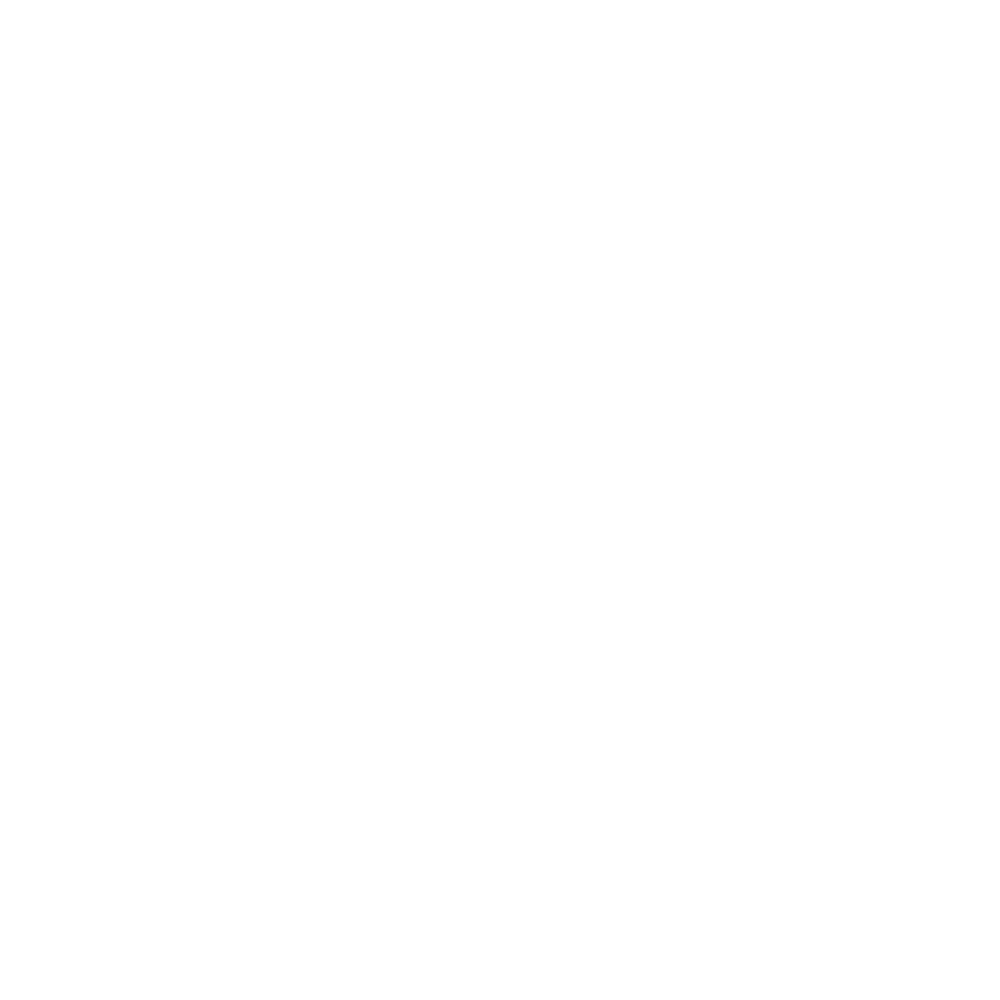

TypeError: Empty 'DataFrame': no numeric data to plot

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import rc
import seaborn as sns

%matplotlib notebook

#sns.set_style('whitegrid')
sns.set_style('dark')

pdfAll=pdfCarsSales.rename(columns={'date':'Date'}).set_index('Date')
pdfAll.index_to_datetime().sort_index(inplace=True)

iStartYear=2013

pdfDrawType = pdfType[pdfType.index.year >=iStartYear]
pdfDrawAll = pdfAll[pdfAll.index.year >=iStartYear].groupby(pd.Grouper(freq='M'))['Count'].sum()/1e4

fig_sale_ca, (ax_s1, ax_s2, ax_s3, ax_t)=plt.subplots(figsize=(10,10), nrows=4, ncols=1, sharex=False, 
                                                      gridspec_kw={'height_ratios':[3, 3, 3, 2]})
ax_s1.get_shared_x_axes().join(ax_s1, ax_s2)
ax_t.axis('off')

lstMiddle=list(setEuroMiddle | setJapanMiddle | setKorea)
lstMiddle.sort()
lstRich=list(setEuroHigh | setJapanHigh | setUSA)
lstRich.sort()
lstChina=list(setChina)
lstChina.sort()
lstTrucks=list(setTruck)
lstTrucks.sort()
lstOther=list(setOther)
lstOther.sort()

strText='''
Источник данных: https://auto.vercity.ru 

"Иномарки класса выше среднего" - {rich}
"Иномарки среднего класса" - {middle} 
"Китайские" - {china}
"Россия, Украина, Узбекистан" - {ru}

"Грузовые, коммерческие, автобусы" - {trucks}'''.format(middle=', '.join(lstMiddle), rich=', '.join(lstRich), 
           china=',  '.join(lstChina), trucks=', '.join(lstTrucks), ru=', '.join(lstOther))

ax_t.text(0, 0, strText, fontsize=8, color='black', wrap=True, bbox=dict(boxstyle='round', color='silver', alpha=0.3))
st=fig_sale_ca.suptitle('Продажи авто в РФ', fontsize=12, color='maroon')

pdfDrawAll.plot.line(ax=ax_s1, legend=False, color='navy', grid=True, fontsize=10, lw=3, alpha=0.3)

pdfDrawAll_trend=seasonal_decompose(pdfDrawAll, model='additive', freq=12).trend
pdfDrawAll_trend.plot.line(ax=ax_s1, legend=False, color='navy', grid=True, fontsize=10, lw=1)

ax_s1.set_title('Всего', fontsize=10)
ax_s1.set_ylabel('x 10 000, шт.', fontsize=8)

pdfRich=pdfDrawType.loc[pdfDrawType['type']=='rich', ('Count')]/1e3
pdfRich.plot.line(ax=ax_s2, legend=False, color='indianred', grid=True)

pdfMiddle=pdfDrawType.loc[pdfDrawType['type']=='middle', ('Count')]/1e3
pdfMiddle.plot.line(ax=ax_s2, legend=False, color='maroon')

pdfChina=pdfDrawType.loc[pdfDrawType['type']=='china', ('Count')]/1e3
pdfChina.plot.line(ax=ax_s2, legend=False, color='peru')

pdfRus=pdfDrawType.loc[pdfDrawType['type']=='rus-ukr-uz', ('Count')]/1e3
pdfRus.plot.line(ax=ax_s2, legend=False, color='slategray', grid=True)

ax_s2.set_title('Легковые', fontsize=10)
ax_s2.set_ylabel('x 1 000, шт.', fontsize=8)

pdfTruck=pdfDrawType.loc[pdfDrawType['type']=='truck', ('Count')]/1e2
pdfTruck.plot.line(ax=ax_s3, legend=False, color='darkslategray', 
                   xlim=pd.Timestamp('{year}-01-01'.format(year=iStartYear)), grid=True, lw=3, alpha=0.3)

pdfTruck_trend=seasonal_decompose(pdfTruck, model='additive', freq=12).trend
pdfTruck_trend.plot.line(ax=ax_s3, legend=False, color='darkslategray', grid=True, fontsize=10, lw=1)

ax_s3.set_title('Грузовые, коммерческие, автобусы', fontsize=10)
ax_s3.set_ylabel('x 100, шт.', fontsize=8)
ax_s3.set_xlabel('Дата, по месяцам', fontsize=8)

rich_pt=mpatches.Patch(color='indianred', label='Иномарки класса выше среднего')
middle_pt=mpatches.Patch(color='maroon', label='Иномарки среднего класса')
china_pt=mpatches.Patch(color='peru', label='Китайские')
ru_pt=mpatches.Patch(color='slategray', label='Россия, Украина, Узбекистан')

ax_s2.legend(handles=[rich_pt, middle_pt, china_pt, ru_pt], fontsize=7)

fig_sale_ca.tight_layout()

#st.set_y(0.97)
fig_sale_ca.subplots_adjust(top=0.93)
ax_s2.tick_params(axis='both', which='major', labelsize=8)
ax_s1.tick_params(axis='both', which='major', labelsize=8)
ax_s3.tick_params(axis='both', which='major', labelsize=8)

#fig_sale_ca.tight_layout()
plt.show();
plt.savefig(r'/home/egor/Изображения/car_sales_ru.png')

<IPython.core.display.Javascript object>


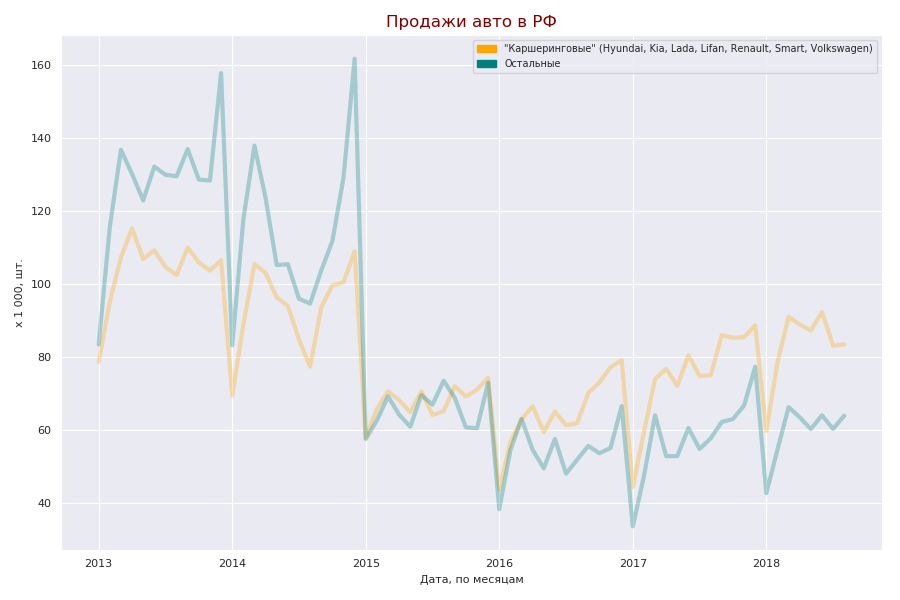

In [32]:
setCarSharing=['Hyundai', 'Kia', 'Lada', 'Lifan', 'Renault','Smart', 'Volkswagen']
setCarSharing.sort()

def grouping2(x):
    if x in setCarSharing:
        return 'car sharing'
    else:
        return 'other'

#fig_sale_csh, (ax_csh1, ax_chs2)=plt.subplots(figsize=(9,6), nrows=2, ncols=1, sharex=True)
fig_sale_csh, ax_chs2=plt.subplots(figsize=(9,6))

#st=fig_sale_csh.suptitle('Продажи авто в РФ', fontsize=12, color='maroon')

#pdfDrawAll.plot.line(ax=ax_csh1, legend=False, color='navy', grid=True, fontsize=10, lw=3, alpha=0.3)

#pdfDrawAll_trend=seasonal_decompose(pdfDrawAll, model='additive', freq=12).trend
#pdfDrawAll_trend.plot.line(ax=ax_csh1, legend=False, color='navy', grid=True, fontsize=10, lw=1)

#ax_csh1.set_title('Всего', fontsize=10)
#ax_csh1.set_ylabel('x 10 000, шт.', fontsize=8)

pdfCarsSales['ca_she']=pdfCarsSales['Model'].apply(grouping2)
grpS1=pdfCarsSales.groupby(['ca_she', 'date'])
pdfCaShe=FuelsDataFrame(grpS1['Count'].sum().reset_index().rename(columns={'date':'Date'})).set_index('Date')
pdfCaShe.index_to_datetime().sort_index(inplace=True)

pdfCaSheDr=pdfCaShe.loc[(pdfCaShe.index.year>=iStartYear) & (pdfCaShe['ca_she'] == 'car sharing'), ('Count')]/1e3
pdfCaSheDr.plot.line(ax=ax_chs2, legend=False, color='orange', grid=True, lw=3, alpha=0.3)
#print(pdfCaSheDr)

pdfCaSheO=pdfCaShe.loc[(pdfCaShe.index.year>=iStartYear) & (pdfCaShe['ca_she'] == 'other'), ('Count')]/1e3
pdfCaSheO.plot.line(ax=ax_chs2, legend=False, color='teal', grid=True, lw=3, alpha=0.3)


ax_chs2.set_title('Продажи авто в РФ', fontsize=12, color='maroon')
ax_chs2.set_ylabel('x 1 000, шт.', fontsize=8)

ax_chs2.tick_params(axis='both', which='major', labelsize=8)
#ax_csh1.tick_params(axis='both', which='major', labelsize=8)

cashe_pt=mpatches.Patch(color='orange', label='"Каршеринговые" ({})'.format(', '.join(setCarSharing)))
other_pt=mpatches.Patch(color='teal', label='Остальные')

ax_chs2.legend(handles=[cashe_pt, other_pt], fontsize=7)
ax_chs2.set_xlabel('Дата, по месяцам', fontsize=8)

fig_sale_csh.tight_layout()

plt.show();
plt.savefig(r'/home/egor/Изображения/car_sales_carsharing.png')